In [164]:
import numpy as np
import pandas as pd

In [165]:
# Try reading the CSV file with different encodings
try:
    df = pd.read_csv("spam.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv("spam.csv", encoding='Windows-1252')

In [166]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5005,ham,ILL B DOWN SOON,NaN,NaN,NaN
2467,ham,Is there coming friday is leave for pongal?do ...,NaN,NaN,NaN
5309,ham,"Jolly good! By the way, will give u tickets f...",NaN,NaN,NaN
2410,ham,Ok... Thanx... Gd nite 2 Ì_ too...,NaN,NaN,NaN
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...,NaN,NaN,NaN


In [167]:
df.shape

(5572, 5)

## Data Cleaning-

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [169]:
# Dropping the last 3 columns-
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [170]:
df.sample(5)

,v1,v2
3220,spam,"Thanks for your ringtone order, reference numb..."
2243,ham,Boo I'm on my way to my moms. She's making tor...
5459,ham,If you hear a loud scream in about &lt;#&gt; m...
2953,ham,Think i might have to give it a miss. Am teach...
2192,ham,Congrats ! Treat pending.i am not on mail for ...


In [171]:
# renaming the columns-
df.rename(columns={'v1': 'target', 'v2': 'text'},inplace = True)
df.sample(5)

,target,text
1780,spam,BIG BROTHER ALERT! The computer has selected u...
4997,ham,Can you talk with me..
2248,ham,will you like to be spoiled? :)
2047,ham,No de. But call me after some time. Ill tell y...
3133,ham,Ok going to sleep. Hope i can meet her.


In [172]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [173]:
df['target'] = encoder.fit_transform(df['target'])

In [174]:
# 0 = Ham and 1 = Spam
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
# Checking for missing values-
df.isnull().sum()

target    0
text      0
dtype: int64

In [176]:
# Checking for duplicate values-
df.duplicated().sum()

403

In [177]:
# Removing duplicates-
df = df.drop_duplicates(keep = 'first')

In [178]:
# Checking for duplicate values again-
df.duplicated().sum()

0

In [179]:
df.shape

(5169, 2)

EDA (EXPLORATORY DATA ANALYSIS)-

In [180]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [181]:
# Determining value counts of spam and ham values-
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

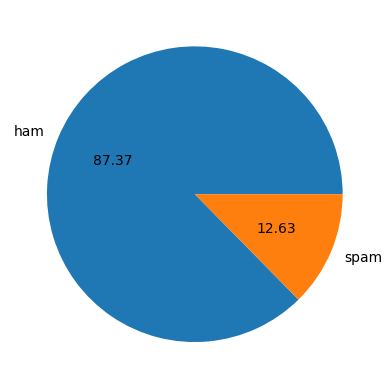

In [182]:
# Creating Visual Representation of the data-
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [183]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [184]:
df['num_characters'] = df['text'].apply(len)

In [185]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [186]:
# Fetching the number of words using nltk-
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # - This code breaks down every character of a message into a list and counts them too

In [187]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [188]:
# Creating a column for number of sentences in each sms-
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [189]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [190]:
# Desscribing the statistics of all messages-
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [191]:
# Showing Stats for only Ham Messages-
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [192]:
# Showing the stats for only Spam messages-
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [193]:
# Plotting histograms-
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

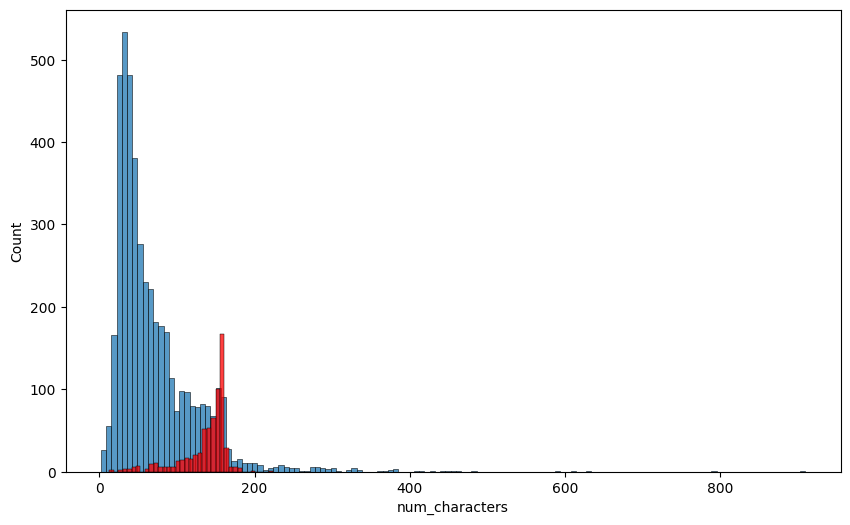

In [194]:
# Extracting and creating histogram for Ham Messages(0) and Spam Messages(1)-
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

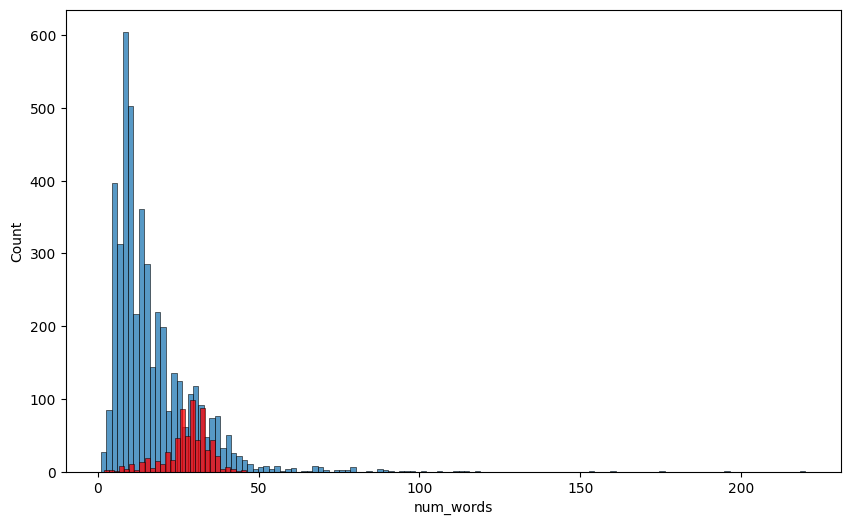

In [195]:
# Plotting histograms for spam and ham messages based on number of words per message-
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

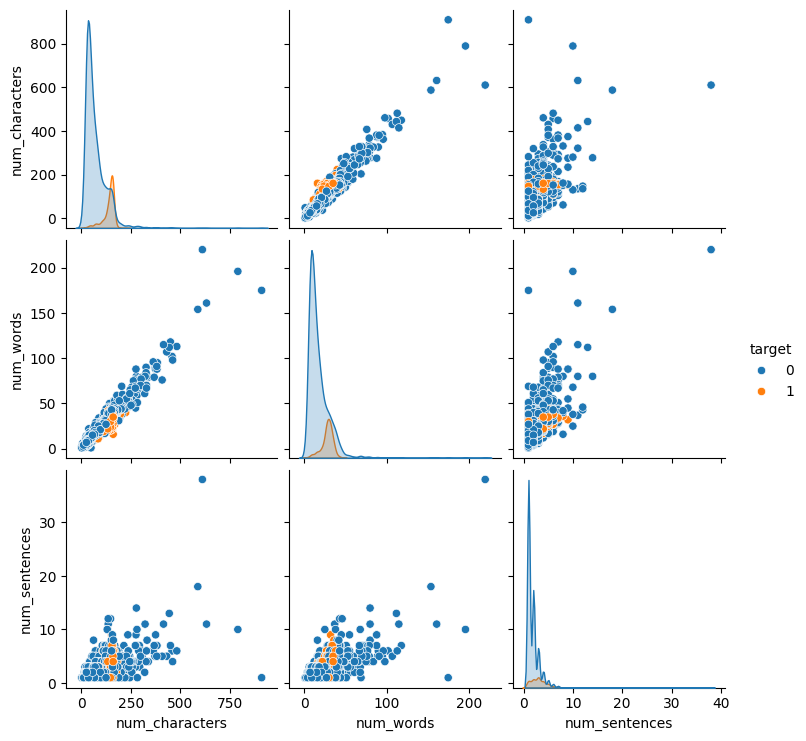

In [196]:
# Creating Visualization for exploring the Relationship between these variables-
sns.pairplot(df,hue='target')

<ipython-input-197-79f953b7a710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

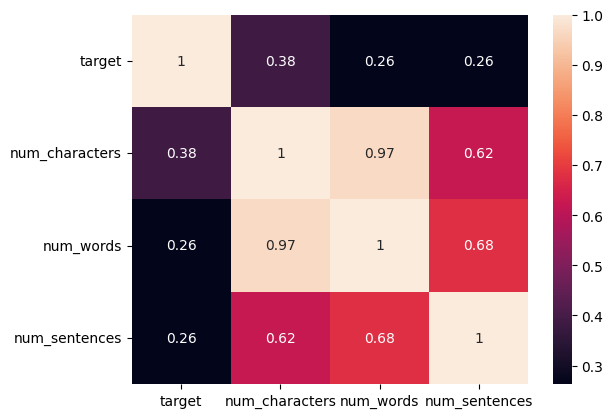

In [197]:
# Looking for correlations using heatmap-
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing-
consists of-


converting data to lowercase


tokenization

removing special characters

removing stopwords and punctuation

stemming


In [198]:
# Downloading and importing stopwords and punctuation marks. Also Importing libraries for Stemming-
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
def transform_text(text):
  text = text.lower() # For Converting to lowercase
  text = nltk.word_tokenize(text)  # For Tokenization

  y = []                      # For removing special characters
  for i in text:              # For Loop that says for each item in the text,
    if i.isalnum():           # If the item is an alphanumeric character
      y.append(i)             # Append the item to the list called y


  text = y[:]                 # Loop for removing stopwords and punctuation
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

  text = y[:]                 # Loop for Stemming
  y.clear()

  for i in text:
      y.append(ps.stem(i))

  return " ".join(y)                    # prints the output value of y in form of a string

In [200]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [201]:
df['transformed_text'] = df['text'].apply(transform_text)            # Transforming the text

In [202]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [203]:
# Generating WordCloud-
from wordcloud import WordCloud      # Importing WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [204]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
#This line creates a word cloud (`spam_wc`) from the transformed text of rows for spam messages.

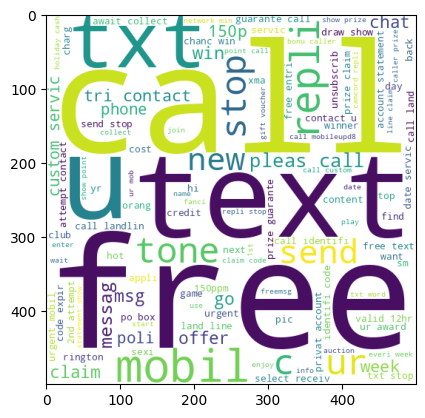

In [205]:
# Displaying the wordcloud-
plt.imshow(spam_wc)

In [206]:
# Generating wordcloud for ham messages-
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

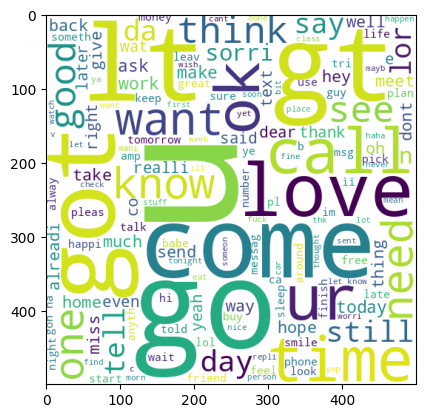

In [207]:
# Displaying the wordcloud-
plt.imshow(ham_wc)

In [208]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [209]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():       # converts all the spam texts from transformed_text column to a list
    for word in msg.split():
      spam_corpus.append(word)

In [210]:
len(spam_corpus)

9939

In [211]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():       # converts all the ham texts from transformed_text column to a list
    for word in msg.split():
      ham_corpus.append(word)

In [212]:
len(ham_corpus)

35404

# Model Building-

In [213]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer     # Importing count vectorizer and TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [214]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [216]:
y = df['target'].values

In [217]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB        # Importing Naive Bayes
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score   # Importing metrics from sklearn's metrics library

In [221]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [222]:
# This code will print the output of Gaussian Naive Bayes -
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [223]:
# This code will print the output of Multinomial Naive Bayes-
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [224]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Chose Tfidf with MNB

In [225]:
# Importing useful libraries-
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [226]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [227]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

In [229]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [230]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [231]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [232]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
4,LR,0.974855,0.982759
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [233]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [234]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.975822
1,LR,Accuracy,0.974855
2,KN,Accuracy,0.905222
3,ETC,Accuracy,0.974855
4,NB,Accuracy,0.978723
5,AdaBoost,Accuracy,0.960348
6,SVC,Accuracy,0.969052
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


# Trying to Improve The Model-

In [235]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [236]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [237]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [238]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [239]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [240]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,LR,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
2,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
3,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [247]:
from sklearn.ensemble import VotingClassifier
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [248]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [249]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.968


In [250]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [251]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [252]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [255]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the preprocessing function
def preprocess_message(message):
    # Convert to lowercase
    message = message.lower()
    # Tokenization
    message = nltk.word_tokenize(message)
    # Remove special characters
    message = [word for word in message if word.isalnum()]
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    message = [word for word in message if word not in stop_words and word not in string.punctuation]
    # Stemming
    porter = PorterStemmer()
    message = [porter.stem(word) for word in message]
    return " ".join(message)

# Example SMS message
sms_message = "Enter The message that you want to check here."

# Preprocess the SMS message
preprocessed_message = preprocess_message(sms_message)

# Transform the preprocessed message using TfidfVectorizer
message_vector = tfidf.transform([preprocessed_message])

# Convert sparse matrix to dense numpy array
message_vector_dense = message_vector.toarray()

# Scale the message vector
message_vector_scaled = scaler.transform(message_vector_dense)

# Predict whether the message is spam or not spam
prediction = voting.predict(message_vector_scaled)

# Display the prediction
if prediction == 1:
    print("The message is classified as spam.")
else:
    print("The message is not spam.")


The message is not spam.
